In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
m = pd.read_csv(r"C:\Users\phani\OneDrive\Documents\Machine learning internship\Project\cards.csv", header=0)

# Copy the file to back-up file

m_bk = m.copy()

# display first 5 records

m.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [3]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int64  
 4   used_chip                       1000000 non-null  int64  
 5   used_pin_number                 1000000 non-null  int64  
 6   online_order                    1000000 non-null  int64  
 7   fraud                           1000000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB


In [4]:
m.nunique()

distance_from_home                999971
distance_from_last_transaction    999836
ratio_to_median_purchase_price    999808
repeat_retailer                        2
used_chip                              2
used_pin_number                        2
online_order                           2
fraud                                  2
dtype: int64

In [5]:
m.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [6]:
cat=['used_chip','used_pin_number']
m=pd.get_dummies(m,columns=cat)
m.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,online_order,fraud,used_chip_0,used_chip_1,used_pin_number_0,used_pin_number_1
0,57.877857,0.311140,1.945940,1,0,0,0,1,1,0
1,10.829943,0.175592,1.294219,1,0,0,1,0,1,0
2,5.091079,0.805153,0.427715,1,1,0,1,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,0,1,1,0
4,44.190936,0.566486,2.222767,1,1,0,0,1,1,0


In [7]:
IndepVar = []
for col in m.columns:
    if col != 'fraud':
        IndepVar.append(col)

TargetVar = 'fraud'

x = m[IndepVar]
y = m[TargetVar]

In [8]:
x.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,online_order,used_chip_0,used_chip_1,used_pin_number_0,used_pin_number_1
0,57.877857,0.311140,1.945940,1,0,0,1,1,0
1,10.829943,0.175592,1.294219,1,0,1,0,1,0
2,5.091079,0.805153,0.427715,1,1,1,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,1,0


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800000, 9), (200000, 9), (800000,), (200000,))

In [11]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [12]:
Results = pd.read_csv(r"C:\Users\phani\OneDrive\Documents\Machine learning internship\Project\cardsresult.csv", header=0)
Results.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1_Score,Specificity,MCC,ROC_AUC_Score,Balanced Acuuracy


Confusion matrix : 
 [[ 15320   2161]
 [  9367 173152]]
Outcome values : 
 15320 2161 9367 173152
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.88      0.73     17481
           0       0.99      0.95      0.97    182519

    accuracy                           0.94    200000
   macro avg       0.80      0.91      0.85    200000
weighted avg       0.96      0.94      0.95    200000

Accuracy : 94.2 %
Precision : 62.1 %
Recall : 87.6 %
F1 Score : 0.727
Specificity or True Negative Rate : 94.9 %
Balanced Accuracy : 91.2 %
MCC : 1.222
roc_auc_score: 0.913


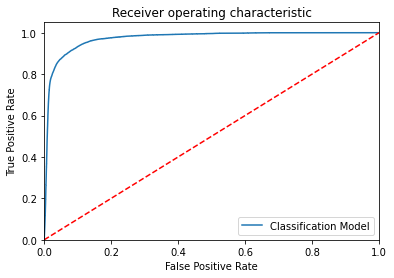

In [13]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

# Create an object for model

ModelLR = LogisticRegression()

# Train the model

ModelLR.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelLR.predict(x_test)
y_pred_prob = ModelLR.predict_proba(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)
# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
if(mx<0):
    mx=-mx
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelLR.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 


In [14]:
#random forest
# To build the 'Multinominal Decision Tree' model with random sampling

from sklearn.ensemble import RandomForestClassifier

ModelRF = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                 max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
                                 n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                                 ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelRF.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelRF.predict(x_test)
y_pred_prob = ModelRF.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)



Confusion matrix : 
 [[ 17476      5]
 [ 28867 153652]]
Outcome values : 
 17476 5 28867 153652
Classification report : 
               precision    recall  f1-score   support

           1       0.38      1.00      0.55     17481
           0       1.00      0.84      0.91    182519

    accuracy                           0.86    200000
   macro avg       0.69      0.92      0.73    200000
weighted avg       0.95      0.86      0.88    200000

Accuracy : 85.6 %
Precision : 37.7 %
Recall : 100.0 %
F1 Score : 0.548
Specificity or True Negative Rate : 84.2 %
Balanced Accuracy : 92.1 %
MCC : 1.299
